## IMPORTING RAW DATA FROM EXCEL USING PANDAS

In [93]:
import pandas as pd

WHR_df=pd.read_excel("C:\\Users\\aditi\OneDrive\Desktop\Project\DataPanelWHR2021C2.xls")

print(WHR_df.head(10))

  Country name  year  Life Ladder  Log GDP per capita  Social support  \
0  Afghanistan  2008     3.723590            7.370100        0.450662   
1  Afghanistan  2009     4.401778            7.539972        0.552308   
2  Afghanistan  2010     4.758381            7.646709        0.539075   
3  Afghanistan  2011     3.831719            7.619532        0.521104   
4  Afghanistan  2012     3.782938            7.705479        0.520637   
5  Afghanistan  2013     3.572100            7.725029        0.483552   
6  Afghanistan  2014     3.130896            7.718354        0.525568   
7  Afghanistan  2015     3.982855            7.701992        0.528597   
8  Afghanistan  2016     4.220169            7.696560        0.559072   
9  Afghanistan  2017     2.661718            7.697381        0.490880   

   Healthy life expectancy at birth  Freedom to make life choices  Generosity  \
0                         50.799999                      0.718114    0.167640   
1                         51.20000

## FILTERING COUNTRIES EACH HAVING 5 YEARS OF DATA FROM 2016-2020 USING IMPORTED DATA FROM EXCEL

In [94]:
#Filter Original DataFrame For Data Between 2016-2020( 5 years)
WHR_16_20=WHR_df[(WHR_df['year']==2016) | (WHR_df['year']==2017) | (WHR_df['year']==2018) | (WHR_df['year']==2019) | (WHR_df['year']==2020)]
print('DATAFRAME CONTAINING DATA FROM 2017-2020')
print(WHR_16_20)
print('                      ')

#Count Of Years In Each Country In DataFrame Above
YearCountInCountry=WHR_16_20.groupby(by=['Country name'])['year'].count()
print('COUNTRIES LIST WITH COUNT OF YEARS IN EACH COUNTRY FOR DATA FROM 2016-2020 :')
print(YearCountInCountry)
print('                      ')

#Select Countries With Count Of Five Years
CountriesWithFiveYears=YearCountInCountry[YearCountInCountry==5]
print('COUNTRIES LIST WITH COUNT OF FIVE YEARS IN EACH COUNTRY FOR DATA FROM 2016-2020:')
print(CountriesWithFiveYears)
print('                      ')

#Setting Index to Country name
WHR_16_20=WHR_16_20.set_index(['Country name'])
print('DATAFRAME WITH DATA FROM 2016-2020 & INDEX AS COUNTRY NAME:')
print(WHR_16_20)
print('                      ')

#DataFrame Containing Data For Five Years For Each Country
WHRfive_16_20=WHR_16_20[WHR_16_20.index.isin(CountriesWithFiveYears.index)]
print('DATAFRAME CONTAINING DATA FOR FOUR YEARS FROM 2017-2020 FOR EACH COUNTRY:')
print(WHRfive_16_20)
print('                      ')



DATAFRAME CONTAINING DATA FROM 2017-2020
     Country name  year  Life Ladder  Log GDP per capita  Social support  \
8     Afghanistan  2016     4.220169            7.696560        0.559072   
9     Afghanistan  2017     2.661718            7.697381        0.490880   
10    Afghanistan  2018     2.694303            7.691767        0.507516   
11    Afghanistan  2019     2.375092            7.697248        0.419973   
20        Albania  2016     4.511101            9.437311        0.638411   
...           ...   ...          ...                 ...             ...   
1944     Zimbabwe  2016     3.735400            7.984372        0.768425   
1945     Zimbabwe  2017     3.638300            8.015738        0.754147   
1946     Zimbabwe  2018     3.616480            8.048798        0.775388   
1947     Zimbabwe  2019     2.693523            7.950132        0.759162   
1948     Zimbabwe  2020     3.159802            7.828757        0.717243   

      Healthy life expectancy at birth  Freedo

## COUNT OF COUNTRIES, EACH CONTAINING DATA FOR FIVE YEARS(2016-2020)

In [95]:
#Count Of Countries Containing Data For Five Years
WHRfive_16_20=WHRfive_16_20.reset_index()
CountOfCountries_WHRfive_16_20=WHRfive_16_20['Country name'].nunique()
print('COUNT OF COUNTRIES CONTAINING DATA FROM 2016-2020:')
print(CountOfCountries_WHRfive_16_20)
print('                      ')


COUNT OF COUNTRIES CONTAINING DATA FROM 2016-2020:
88
                      


# 2016-2019 ANALYSIS(Pre-Covid)

## 1. Average Life Ladder From 2016-2019

In [96]:
#Filter Data Between 2016-2019 From DataFrame (2016-2020)
WHR_16_19=WHRfive_16_20[((WHRfive_16_20['year']==2016) | (WHRfive_16_20['year']==2017) | (WHRfive_16_20['year']==2018) | 
                        (WHRfive_16_20['year']==2019)) & (WHRfive_16_20['Life Ladder']!=' ')]

AverageLifeLadder=WHR_16_19['Life Ladder'].mean()
AverageLifeLadder.round(2)

5.78

## 2.Top 5 & Bottom 5 Countries By Average Of Life Ladder From 2016-2019

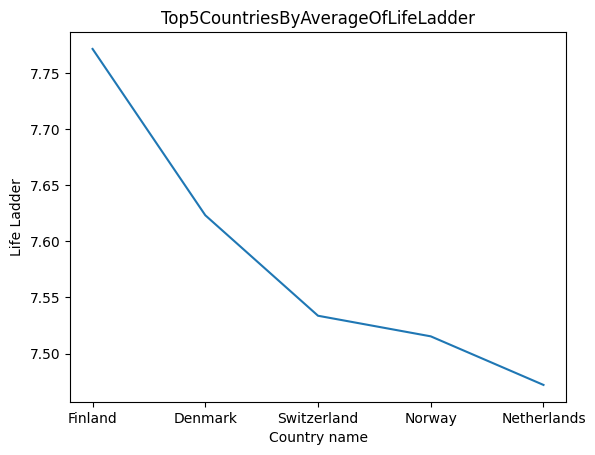

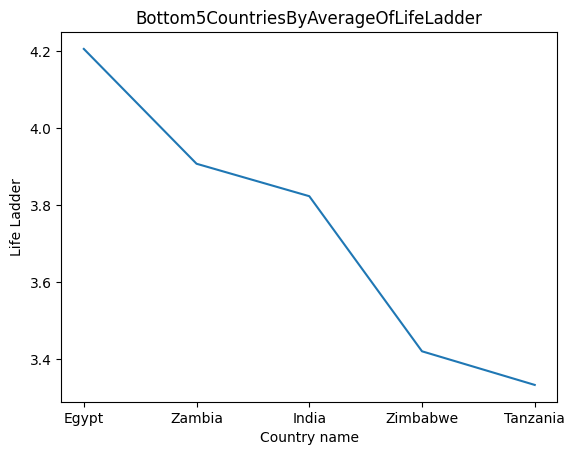

In [97]:
TopCountriesByAverageOfLifeLadder=WHR_16_19.groupby(by=['Country name'])['Life Ladder'].mean().sort_values(ascending=False)
Top5CountriesByAverageOfLifeLadder=TopCountriesByAverageOfLifeLadder.reset_index().head(5)

x=Top5CountriesByAverageOfLifeLadder

import matplotlib.pyplot as plt

plt.plot(x['Country name'], x['Life Ladder'])
plt.title("Top5CountriesByAverageOfLifeLadder")
plt.xlabel("Country name")
plt.ylabel("Life Ladder")
plt.show()

Bottom5CountriesByAverageOfLifeLadder=TopCountriesByAverageOfLifeLadder.reset_index().tail(5)
y=Bottom5CountriesByAverageOfLifeLadder

plt.plot(y['Country name'], y['Life Ladder'])
plt.title("Bottom5CountriesByAverageOfLifeLadder")
plt.xlabel("Country name")
plt.ylabel("Life Ladder")
plt.show()



## 3. Effect & Correlation On Average Life Ladder & Average Healthy Life-Expectancy By Log GDP Per Capita(2016-2019)

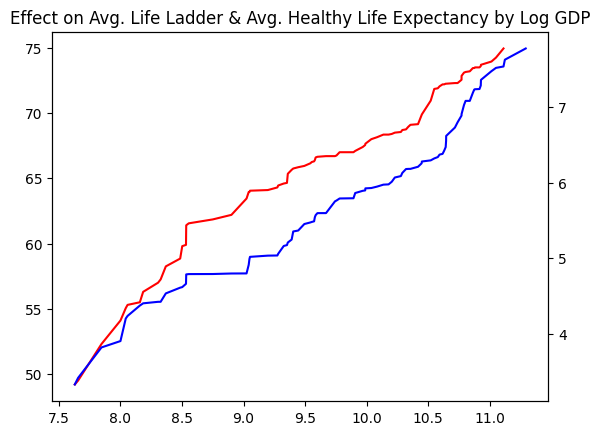

CORRELATION BETWEEN Log GDP per capita & Life Ladder
0.8277016591164394
CORRELATION BETWEEN Log GDP per capita & Healthy life expectancy at birth
0.8492985099426575


C:\Users\aditi\AppData\Local\Temp\ipykernel_16928\660732216.py:28: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  AverageMetrics_16_19=WHR_16_19.groupby(by=['Country name'])['Life Ladder','Log GDP per capita','Social support',


In [228]:
#Filtering Data According To Each Of 3 Metrics & Avearging Each Of Them
AvgHealthLifeExpectancy=WHR_16_19.groupby(by=['Country name'])['Healthy life expectancy at birth'].mean().sort_values()
AvgLifeLadder=WHR_16_19.groupby(by=['Country name'])['Life Ladder'].mean().sort_values()
AvgLog=WHR_16_19.groupby(by=['Country name'])['Log GDP per capita'].mean().sort_values()

#Line Plot Specifications
x=AvgLog
y1=AvgHealthLifeExpectancy
y2=AvgLifeLadder

fig,ax1=plt.subplots()

ax2=ax1.twinx()

#Plotting the Graph
curve1=ax1.plot(AvgLog, y1, label='AvgHealthLifeExpectancy', color='r')
curve1=ax2.plot(AvgLog, y2, label='AvgLifeLadder', color='b')

plt.title("Effect on Avg. Life Ladder & Avg. Healthy Life Expectancy by Log GDP")
plt.plot()
plt.show()

#DataFrame Containing Average Metrics Of Four Years From 2016-2019 For Each Country
AverageMetrics_16_19=WHR_16_19.groupby(by=['Country name'])['Life Ladder','Log GDP per capita','Social support', 
                                                            'Healthy life expectancy at birth' , 'Freedom to make life choices', 
                                                            'Generosity','Perceptions of corruption', 'Positive affect', 
                                                            'Negative affect'].mean()
#Correlation Between Log GDP per capita & Life Ladder
print('CORRELATION BETWEEN Log GDP per capita & Life Ladder')
print(AverageMetrics_16_19['Log GDP per capita'].corr(AverageMetrics_16_19['Life Ladder']))

#Correlation Between Log GDP per capita & Healthy life expectancy at birth
print('CORRELATION BETWEEN Log GDP per capita & Healthy life expectancy at birth')
print(AverageMetrics_16_19['Log GDP per capita'].corr(AverageMetrics_16_19['Healthy life expectancy at birth']))

## 4. Correlation & Effect On Average Life Ladder By Average Freedom To Make Life Choices & Average Social Support(2016-2019)

CORRELATION BETWEEN Freedom to make life choices & Life Ladder
0.4684572347172494
CORRELATION BETWEEN Social Support & Life Ladder
0.726070866693777


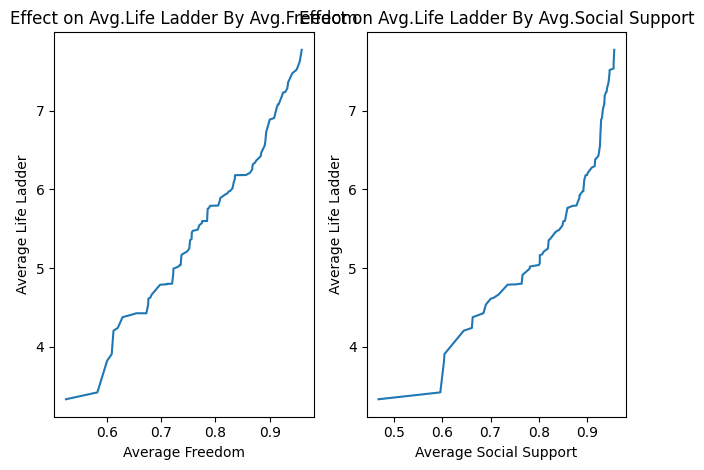

In [231]:
#Filtering Data According To Each Of 3 Metrics and avearging each of them
AvgLifeLadder=WHR_16_19.groupby(by=['Country name'])['Life Ladder'].mean().sort_values()
AvgFreedom=WHR_16_19.groupby(by=['Country name'])['Freedom to make life choices'].mean().sort_values()
AvgSocialSupport=WHR_16_19.groupby(by=['Country name'])['Social support'].mean().sort_values()

#Declaring subplot specification
fig, ax = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2, 2]})
fig.tight_layout()

#subplot1
plt.subplot(1,2,1)
plt.plot(AvgFreedom,AvgLifeLadder)
plt.title("Effect on Avg.Life Ladder By Avg.Freedom")
plt.xlabel("Average Freedom")
plt.ylabel("Average Life Ladder")
fig.tight_layout()

#subplot2(
plt.subplot(1,2,2)
plt.plot(AvgSocialSupport,AvgLifeLadder)
plt.title("Effect on Avg.Life Ladder By Avg.Social Support")
plt.xlabel("Average Social Support")
plt.ylabel("Average Life Ladder")
fig.tight_layout()

#Correlation Between Freedom To Make Life Choices & Life Ladder
print('CORRELATION BETWEEN Freedom to make life choices & Life Ladder')
print(AverageMetrics_16_19['Freedom to make life choices'].corr(AverageMetrics_16_19['Life Ladder']))

#Correlation Between Social Support & Life Ladder
print('CORRELATION BETWEEN Social Support & Life Ladder')
print(AverageMetrics_16_19['Social support'].corr(AverageMetrics_16_19['Life Ladder']))


## 5. Correlation & Effect On Average Positive Affect & Average Negative Affect By Average Life Ladder(2016-2019)

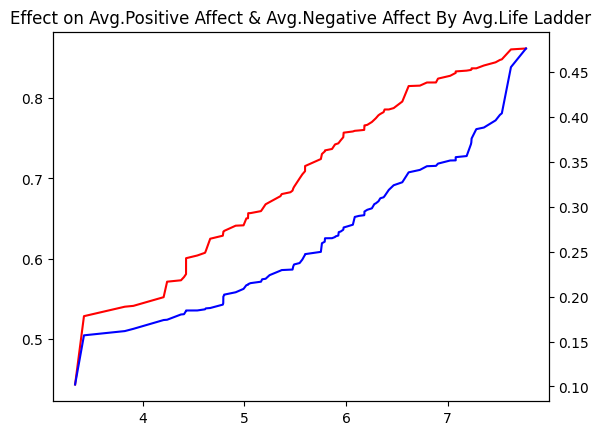

CORRELATION BETWEEN Positive Affect & Life Ladder
0.48291127994232536
CORRELATION BETWEEN Negative Affect & Life Ladder
-0.4361794545622681


In [235]:
#Filtering Data According To Each Of 3 Metrics And Avearging Each Of Them
AvgPositiveAffect=WHR_16_19.groupby(by=['Country name'])['Positive affect'].mean().sort_values()
AvgNegativeAffect=WHR_16_19.groupby(by=['Country name'])['Negative affect'].mean().sort_values()
AvgLifeLadder=WHR_16_19.groupby(by=['Country name'])['Life Ladder'].mean().sort_values()

#Declaring plot specification
x=AvgLifeLadder
y1=AvgPositiveAffect
y2=AvgNegativeAffect
fig,ax1=plt.subplots()
ax2=ax1.twinx()

#Plotting the Graph-RedLine-Positive, BlueLine-Negative
curve1=ax1.plot(x, y1, label='AvgPositiveAffect', color='r')
curve1=ax2.plot(x, y2, label='AvgNegativeAffect', color='b')
plt.title("Effect on Avg.Positive Affect & Avg.Negative Affect By Avg.Life Ladder")
plt.xlabel("Life Ladder")
plt.plot()
plt.show()
fig.tight_layout()

#Correlation Between Positive Affect & Life Ladder
print('CORRELATION BETWEEN Positive Affect & Life Ladder')
print(AverageMetrics_16_19['Positive affect'].corr(AverageMetrics_16_19['Life Ladder']))

#Correlation Between Negative Affect & Life Ladder
print('CORRELATION BETWEEN Negative Affect & Life Ladder')
print(AverageMetrics_16_19['Negative affect'].corr(AverageMetrics_16_19['Life Ladder']))

## 6. Other Correlations Between Metrics(2016-2029)

In [ ]:
print('CORRELATION BETWEEN Freedom to make life choices & Positve affect')
print(AverageMetrics_16_19['Freedom to make life choices'].corr(AverageMetrics_16_19['Positive affect']))

print('CORRELATION BETWEEN Generosity & Positve affect')
print(AverageMetrics_17_19['Generosity'].corr(AverageMetrics_17_19['Positive affect']))

print('CORRELATION BETWEEN Social support & Positve affect')
print(AverageMetrics_17_19['Social support'].corr(AverageMetrics_17_19['Positive affect']))

print('CORRELATION BETWEEN Healthy life expectancy at birth & Positve affect')
print(AverageMetrics_17_19['Healthy life expectancy at birth'].corr(AverageMetrics_17_19['Positive affect']))

print('CORRELATION BETWEEN Log GDP per capita & Positve affect')
print(AverageMetrics_17_19['Log GDP per capita'].corr(AverageMetrics_17_19['Positive affect']))

print('CORRELATION BETWEEN Perceptions of corruption & Positve affect')
print(AverageMetrics_17_19['Perceptions of corruption'].corr(AverageMetrics_17_19['Positive affect']))



# ANALYSIS FROM 2019-2020(Transitioning To Covid)

## 1. Top 5 Countries By Taking Average of Life Ladder in (2019-2020)

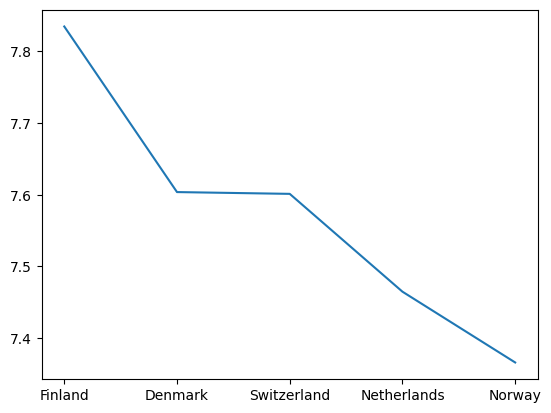

In [224]:
#Filter Data For 2019-2020 From DataFrame 2016-2020(WHRfive_16_20) Without Null Values in Life Ladder
WHR_19_20=WHRfive_16_20[((WHRfive_16_20['year']==2019) | (WHRfive_16_20['year']==2020)) & (WHRfive_16_20['Life Ladder']!=' ')]

#Finding Average of Life Ladder & Sorting Filtered Data According To Life Ladder In Descending Order
Top5CountriesByAvgLifeLadder_19_20=WHR_19_20.groupby(by=['Country name'])['Life Ladder'].mean().sort_values(ascending=False)

#Filtering Top 5 Countries
x=Top5CountriesByAvgLifeLadder_19_20.reset_index().head(5)

#Plotting Line Graph
plt.plot(x['Country name'],x['Life Ladder'])

## 2. Top 5 Countries By Increase In Average Of Life Ladder From  2019 To 2020

In [227]:
#Filter Data For 2019 From DataFrame 2016-2020(WHRfive_16_20) Without Null Values in Life Ladder
WHR_19=WHRfive_16_20[((WHRfive_16_20['year']==2019)) & (WHRfive_16_20['Life Ladder']!=' ')].sort_values(by=['Country name'])

#Changing Index To Country Name(to keep only numeric Data in Columns) in DataFrame For 2019(WHR_19)
x=WHR_19.set_index('Country name')

#Filter Data For 2020 From DataFrame 2016-2020(WHRfive_16_20) Without Null Values in Life Ladder
WHR_20=WHRfive_16_20[((WHRfive_16_20['year']==2020)) & (WHRfive_16_20['Life Ladder']!=' ')].sort_values(by=['Country name'])

#Changing Index To Country Name(to keep only numeric Data in Columns) in DataFrame For 2020(WHR_20)
y=WHR_20.set_index('Country name')

#Finding Difference Between Average Life Ladder From 2019 to 2020
diff=y['Life Ladder']-x['Life Ladder']

#Finding Increase Between Average Life Ladder From 2019 to 2020(by keeping (diff>0))
#Filtering Top 5 Countries By Sorting Life Ladder in Descending order
Top5CountriesWithIncFrom19_20=((diff[diff>0]).sort_values(ascending=False).head(5))
Top5CountriesWithIncFrom19_20

Country name
Zambia     1.531196
Nigeria    1.146529
India      0.976511
Croatia    0.882248
China      0.626945
Name: Life Ladder, dtype: float64

## 3. Contributing Factors For Increase In Life Ladder For Top 5 Countries B/w 2019 To 2020 (shown as percentage)(2019-2020)

In [185]:
ChangePerc=((y-x)/x)*100
Factors=ChangePerc[ChangePerc.index.isin(Top5CountriesWithIncFrom19_20.index)]
Factors=Factors.sort_values(by=['Life Ladder'], ascending=False)
Factors

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
Country name,,,,,,,,,,
Zambia,0.049529,46.304501,-0.466754,20.219215,0.896057,-7.474034,-27.668665,-2.669161,-7.038517,-12.642294
India,0.049529,30.057885,-1.305986,9.960843,0.661160,3.523653,-33.061170,3.742735,16.160767,-17.835458
Nigeria,0.049529,26.318157,-0.699077,0.786827,0.798406,-2.235561,207.899104,4.539267,4.054160,28.808596
Croatia,0.049529,15.682342,-0.898241,-1.396943,0.847455,13.168802,-54.169255,3.147723,34.881904,6.113675
China,0.049529,12.187595,0.145990,-1.654803,0.431039,-3.907155,-40.350876,NaN,-11.387154,67.166170


## 4. Top 5 Countries By Decrease In Life Ladder From 2019 To 2020

In [182]:
dec=x['Life Ladder']-y['Life Ladder']

Top5CountriesWithDecFrom19_20=((dec[dec>0]).sort_values(ascending=False).head(5))

Top5CountriesWithDecFrom19_20

Country name
Philippines           1.188160
El Salvador           0.992894
Dominican Republic    0.835827
Colombia              0.641123
Cambodia              0.621300
Name: Life Ladder, dtype: float64

## 5. Contributing Factors For Decrease In Life Ladder For Top 5 Countries B/w 2019 To 2020 (shown as percentage)(2019-2020)

In [193]:
DecPerc=((x-y)/x)*100
Factors_DecPerc=DecPerc[DecPerc.index.isin(Top5CountriesWithDecFrom19_20.index)]
Factors_DecPerc=Factors_DecPerc.sort_values(by=['Life Ladder'], ascending=False)
Factors_DecPerc.drop( ['Life Ladder', 'year'],axis=1, inplace=True)
Factors

,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
Country name,,,,,,,,
Philippines,0.365941,7.567714,-0.161288,-2.467365,-39.915392,0.555612,-2.902473,4.016945
El Salvador,0.671044,8.996210,-0.451800,-5.305977,-16.194082,14.457677,3.637648,-21.351775
Dominican Republic,0.190344,8.819492,-0.453862,4.873830,-4.187580,14.685695,6.420582,-18.887865
Cambodia,0.296604,4.577709,-0.645164,-0.655963,-296.515601,-4.177648,-3.979350,-0.068106
Colombia,1.064953,8.657521,-0.441181,-2.274545,50.826853,5.351413,3.326196,-5.702903



# 2017 ANALYSIS

## 1. Filter Data For 2017 

In [223]:
#Filter Data For Year 2017 Without Null(Positive affect) Values
WHRfive_17=WHRfive_16_20[(WHR_df['year']==2017) & (WHR_df['Positive affect']!='NaN')]

WHRfive_17.head(5)

C:\Users\aditi\AppData\Local\Temp\ipykernel_16928\2792787754.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  WHRfive_17=WHRfive_16_20[(WHR_df['year']==2017) & (WHR_df['Positive affect']!='NaN')]


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
9,Argentina,2020,5.900567,9.850450,0.897104,69.199997,0.823392,-0.122354,0.815780,0.763524,0.342497
21,Bangladesh,2017,4.309771,8.333532,0.712553,63.799999,0.896217,0.011620,0.635014,0.568827,0.213506
30,Benin,2016,4.007358,7.993432,0.492816,53.500000,0.779795,-0.065072,0.837716,0.608237,0.455768
48,Brazil,2019,6.451149,9.592306,0.899175,66.599998,0.830206,-0.061973,0.761841,0.760846,0.337051
63,Cameroon,2019,4.936738,8.203218,0.710965,53.500000,0.711500,-0.007858,0.817170,0.629451,0.326395


## 2. Total Countries Having Data For 2017 

In [ ]:
#Total Countries Having Data For 2017
CountOfCountries_WHRfive_17=WHRfive_17['Country name'].nunique()
print('TOTAL COUNTRIES HAVING DATA FOR 2017:')
print(CountOfCountries_WHRfive_17)
print('                      ')

## 3. Top 5 Countries with Most positive Affect In 2017

TOP 5 COUNTRIES WITH MOST POSITIVE AFFECT:
                 Country name  year  Life Ladder  Log GDP per capita  \
368  Taiwan Province of China  2019     6.537090                 NaN   
76                      China  2017     5.099061            9.571116   
304               Philippines  2020     5.079585            9.061443   
274                   Myanmar  2020     4.431364            8.553914   
419             United States  2020     7.028088           11.000656   

     Social support  Healthy life expectancy at birth  \
368        0.893431                               NaN   
76         0.772033                         69.000000   
304        0.781140                         62.099998   
274        0.795763                         59.599998   
419        0.937370                         68.099998   

     Freedom to make life choices  Generosity  Perceptions of corruption  \
368                      0.814484         NaN                   0.718112   
76                       0.87

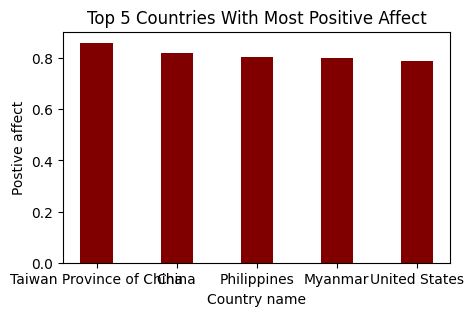

In [220]:
#Sorting Data According To Positive Affect In Descending
WHRfive_17_sort=WHRfive_17.sort_values(by=['Positive affect'], ascending=False)

#Top 5 Countries With Most Positive Affect
Top5CountriesWithPositiveAffect=WHRfive_17_sort.head(5)
print('TOP 5 COUNTRIES WITH MOST POSITIVE AFFECT:')
print(Top5CountriesWithPositiveAffect)
print('                      ')

#Creating Bar Graph For Top 5 Countries With Most Positive Affect
fig = plt.figure(figsize = (5, 3))
plt.bar(Top5CountriesWithPositiveAffect['Country name'], Top5CountriesWithPositiveAffect['Positive affect'], 
        color ='maroon', width = 0.4)
plt.xlabel("Country name")
plt.ylabel("Postive affect")
plt.title("Top 5 Countries With Most Positive Affect")
plt.show()

## 4. Bottom 5 Countries With Least Positive Affect In 2017

BOTTOM 5 COUNTRIES WITH LEAST POSITIVE AFFECT:
    Country name  year  Life Ladder  Log GDP per capita  Social support  \
385      Tunisia  2016     4.521453            9.261508        0.701822   
144      Georgia  2020     5.123143            9.569304        0.718346   
30         Benin  2016     4.007358            7.993432        0.492816   
21    Bangladesh  2017     4.309771            8.333532        0.712553   
202       Jordan  2018     4.638934            9.195625        0.799544   

     Healthy life expectancy at birth  Freedom to make life choices  \
385                         66.300003                      0.614438   
144                         64.099998                      0.764352   
30                          53.500000                      0.779795   
21                          63.799999                      0.896217   
202                         66.800003                      0.762420   

     Generosity  Perceptions of corruption  Positive affect  Negative affec

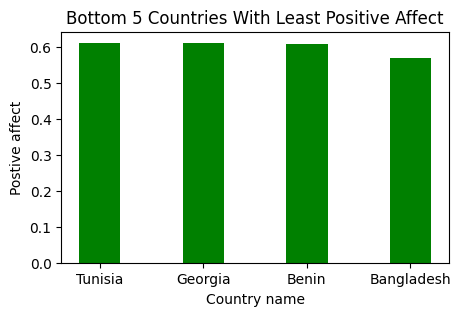

In [221]:
#Bottom 5 Countries With Least Positive Affect 
Bottom5CountriesWithLeastPositiveAffect=WHRfive_17_sort.tail(5)
print('BOTTOM 5 COUNTRIES WITH LEAST POSITIVE AFFECT:')
print(Bottom5CountriesWithLeastPositiveAffect)
print('                      ')

#Creating Bar Graph For Bottom 5 Countries With Least Positive Affect 
fig = plt.figure(figsize = (5, 3))
plt.bar(Bottom5CountriesWithLeastPositiveAffect['Country name'], Bottom5CountriesWithLeastPositiveAffect['Positive affect'], 
        color ='green', width = 0.4)
plt.xlabel("Country name")
plt.ylabel("Postive affect")
plt.title("Bottom 5 Countries With Least Positive Affect")
plt.show()

# FILTERING & COMPARING AVERAGE METRICS B/W PERIOD(2016-2019) & PERIOD 2020  


In [210]:
#Filtering DataFrame For Four Years(2016-2019) From DataFrame(2016-2020) 
WHR_16_19=WHRfive_16_20[(WHRfive_16_20['year']==2016) | (WHRfive_16_20['year']==2017) | (WHRfive_16_20['year']==2018) | 
                        (WHRfive_16_20['year']==2019)]

#DataFrame Containing Average Metrics Of Four Years From 2016-2019 For Each Country
AverageMetrics_16_19=WHR_16_19.groupby(by=['Country name'])['Life Ladder','Log GDP per capita','Social support', 
                                                            'Healthy life expectancy at birth' , 'Freedom to make life choices', 
                                                            'Generosity','Perceptions of corruption', 'Positive affect', 
                                                            'Negative affect'].mean()

AverageMetrics_16_19=AverageMetrics_16_19.sort_values(by=['Country name'])

#DataFrame Containing Data For 2020 For Each Country
Metrics_20=WHRfive_16_20[(WHRfive_16_20['year']==2020)]
Metrics_20= Metrics_20.groupby(by=['Country name'])['Life Ladder','Log GDP per capita','Social support', 
                                                            'Healthy life expectancy at birth' , 'Freedom to make life choices', 
                                                            'Generosity','Perceptions of corruption', 'Positive affect', 
                                                            'Negative affect'].mean()

Metrics_20=Metrics_20.sort_values(by=['Country name'])

#Difference In Metrics Between y2020 & From Period y2016-y2019
(Metrics_20-AverageMetrics_16_19).sort_values(by=['Life Ladder'],ascending=False).head(5)

C:\Users\aditi\AppData\Local\Temp\ipykernel_16928\574087656.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  AverageMetrics_16_19=WHR_16_19.groupby(by=['Country name'])['Life Ladder','Log GDP per capita','Social support',
C:\Users\aditi\AppData\Local\Temp\ipykernel_16928\574087656.py:16: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Metrics_20= Metrics_20.groupby(by=['Country name'])['Life Ladder','Log GDP per capita','Social support',


,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
Country name,,,,,,,,,
Croatia,1.027478,-0.038205,0.069304,1.500002,0.132170,0.051306,0.052779,0.142349,-0.017530
Zambia,0.930841,-0.040624,0.050268,1.250000,-0.058680,-0.041035,0.021532,-0.024270,-0.031668
Kyrgyzstan,0.882417,-0.030602,0.009189,0.749997,0.050207,-0.013078,0.035477,0.037448,0.083546
Ukraine,0.843819,0.024519,0.002949,0.749996,0.164327,0.163132,0.031718,0.080512,0.065393
Bangladesh,0.660150,0.103977,0.054238,1.250002,-0.116114,0.034127,0.071586,0.030544,0.036899
